# Preprocessing: Water treatment plants

**Objective**: Prepare data from the **MERKUR** dataset for use in machine learning algorithms.

**Background**: The MERKUR project, based in the *Research Centre for Built Environment, Climate, Water Technology and Digitalisation* at VIA University College, collects and analyzes data from water treatment plants in Denmark. In short, the project aims to understand how water treatment plants are run, and the results are then ideally used to optimize the running of water treatment plants. However, the dataset is, as of now, relatively "dirty" in a machine learning context: There are many missing values, outliers, a mix of categorical and numeric data, etc.

**Data Source**: The dataset has kindly been provided to us by Senior Associate Professor Loren Mark Ramsay. You can read more [here](https://en.via.dk/research/built-environment-climate-water-technology-and-digitalisation/water-treatment-and-distribution) and [here](https://www.ucviden.dk/en/projects/merkur-national-web-baseret-dataplatform-til-drikkevandsbehandlin).

Note that we are only working with a subset of the full database. This subset is saved as an Excel file, `merkur.xlsx`.

#### Overall Instructions
1. Explore the dataset to understand the features and their distributions.
2. Preprocess the data, handling any missing values, outliers, etc.

Below some suggestions are given but the assignment is relatively "free".

Best of luck with your analysis!

In [1]:
import pandas as pd

df = pd.read_excel(r"merkur.xlsx")
df

,WaterworksName,TotalFilters,MaxTypicalFlow,AverageFilterArea,AverageTypicalRunVolume,AverageBackwashVolume,PrimaryTrigger,AverageTotalFilterDepth,OverallFilterGrainSizeMin,OverallFilterGrainSizeMax,...,SumOfld_layer,UniformityCoefficient,UFRV,BW%,HLR_BW,TankCapacity,TankExploitation,GravityPressureMixed,Stages,AbstractedVolume
0,Asnæs Vandværk,6,50.00,6.000000,5200.00000,10.00,Time,NaN,NaN,NaN,...,NaN,NaN,866.666667,0.414525,NaN,27.294778,NaN,Gravity,Single,253543
1,Assens Vandværk,4,110.00,4.908739,300.00000,28.00,Volume,310.0,0.8,5.0,...,2891.666665,NaN,40.743665,23.000062,30.557749,2.576075,NaN,Pressure,Double,612094
2,Astrup Vandværk - Esbjerg,4,120.00,15.343900,3800.00000,83.30,Volume,190.0,2.0,35.0,...,759.000000,1.491,249.217919,2.192086,32.791831,21.825600,NaN,Gravity,Double,682318
3,Astrup Vandværk - Skjern,2,NaN,16.000000,1200.00000,26.00,Volume,NaN,NaN,NaN,...,NaN,NaN,75.000000,2.166907,NaN,12.554300,NaN,Gravity,Single,156998
4,Avernakø Vandværk,2,NaN,1.495000,250.00000,4.50,Volume,NaN,1.6,32.0,...,NaN,NaN,167.224093,1.818182,NaN,52.220566,NaN,Gravity,Single,6710
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74,Værket ved Regnemark,16,1426.00,47.940002,NaN,110.00,Mix,142.0,0.8,150.0,...,90.809524,NaN,NaN,0.178441,NaN,9.176959,39.682540,Gravity,Double,11454775
75,Værket ved Søndersø,20,1407.29,10.178760,4500.00000,57.00,Volume,190.0,0.8,8.0,...,1708.095230,1.625,442.097088,1.236822,51.086775,6.040393,NaN,Pressure,Single,11021800
76,Østerbyværket,6,250.00,14.752500,2331.50137,51.57,Time,170.0,1.4,4.0,...,842.857154,1.850,158.041107,4.446077,30.367735,22.367525,45.833333,Gravity,Single,423362
77,Østre Vandværk - Herning,12,NaN,37.437401,4400.00000,134.00,Volume,NaN,NaN,NaN,...,NaN,NaN,93.489396,35.386015,32.053507,NaN,NaN,Gravity,Double,1521895


### Suggestions

-  Filter out (i.e. remove) any irrelevant columns (e.g. names, IDs, etc.)
-  Several columns contain missing values (NaNs). Find out how large a percentage each column is missing. Perhaps some of them lack so much data that you should consider removing them?
-  Scale numeric data.
-  For the features you choose to keep, impute the missing values in an appropriate way - or perhaps you find it more appropriate to delete the rows?
-  Several features (e.g., "PrimaryTrigger") are categorical. Use one-hot encoding to turn them into numeric data. Be careful with the feature "Stages" - perhaps one-hot encoding is not the best choice here?
-  If you you choose to remove or replace outliers, do this now. If you choose to keep, move on.
-  Create a correlation matrix and discuss - based on this, you might want to drop certain columns.
-  Consider whether some features should be transformed (e.g. using log, square root etc.) and do this if found relevant.
-  There are only about 80 rows in the data set. Discuss consequences of this in terms of machine learning - as well as potential solutions. 
-  Think about whether there are other steps you find appropriate at this point. If not, declare your data set clean.

1. Find out if there are duplicates in data

In [2]:
df.duplicated().sum()


0

2. Find out how much of data is missing in each column

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79 entries, 0 to 78
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   WaterworksName             79 non-null     object 
 1   TotalFilters               79 non-null     int64  
 2   MaxTypicalFlow             63 non-null     float64
 3   AverageFilterArea          75 non-null     float64
 4   AverageTypicalRunVolume    77 non-null     float64
 5   AverageBackwashVolume      69 non-null     float64
 6   PrimaryTrigger             79 non-null     object 
 7   AverageTotalFilterDepth    46 non-null     float64
 8   OverallFilterGrainSizeMin  45 non-null     float64
 9   OverallFilterGrainSizeMax  45 non-null     float64
 10  AverageFilterBedVolume     45 non-null     float64
 11  FilterExploitation         63 non-null     float64
 12  AerationType               79 non-null     object 
 13  OxygenFactor               79 non-null     float64
 

In [4]:
#Dropping irrelevant column

df = df.drop(['WaterworksName'], axis=1)
df.isnull().sum()

TotalFilters                  0
MaxTypicalFlow               16
AverageFilterArea             4
AverageTypicalRunVolume       2
AverageBackwashVolume        10
PrimaryTrigger                0
AverageTotalFilterDepth      33
OverallFilterGrainSizeMin    34
OverallFilterGrainSizeMax    34
AverageFilterBedVolume       34
FilterExploitation           16
AerationType                  0
OxygenFactor                  0
Stage1HLR                    21
TotalEBCT                    39
Footprint                     4
SumOfld_layer                39
UniformityCoefficient        51
UFRV                          7
BW%                          13
HLR_BW                       27
TankCapacity                  4
TankExploitation             30
GravityPressureMixed          0
Stages                        0
AbstractedVolume              0
dtype: int64

<Axes: >

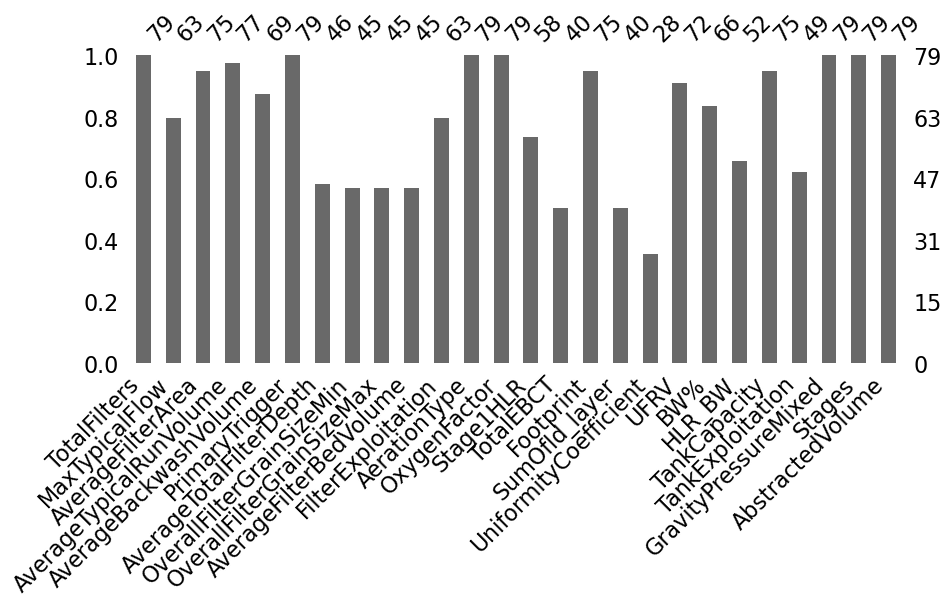

In [5]:
# Visualizing the missing values in a graph

import missingno as msno

msno.bar(df,figsize=(10,4)) 

In [6]:
# Based on the analysis above, we found out that it would be irrelevant to keep columns such as: 
# AverageTotalFilterDepth, OverallFilterGrainSizeMin, OverallFilterGrainSizeMax, AverageFilterBedVolume, TotalEBCT, SumOfId_layer, UniformityCoefficient, TankExploitation.
# Filling this type of data wouldnt fix the issue of improving the quality of the dataset, so it is better to just remove it. 

df_drop_columns = ['AverageTotalFilterDepth', 'OverallFilterGrainSizeMin', 'OverallFilterGrainSizeMax', 'AverageFilterBedVolume', 'TotalEBCT', 'SumOfld_layer', 'UniformityCoefficient', 'TankExploitation']

df_new = df.drop(df_drop_columns, axis=1)
df_new

,TotalFilters,MaxTypicalFlow,AverageFilterArea,AverageTypicalRunVolume,AverageBackwashVolume,PrimaryTrigger,FilterExploitation,AerationType,OxygenFactor,Stage1HLR,Footprint,UFRV,BW%,HLR_BW,TankCapacity,GravityPressureMixed,Stages,AbstractedVolume
0,6,50.00,6.000000,5200.00000,10.00,Time,57.886530,Cascade,1.880000,1.388889,143.341204,866.666667,0.414525,NaN,27.294778,Gravity,Single,253543
1,4,110.00,4.908739,300.00000,28.00,Volume,63.521586,Air injection,1.620000,11.204508,16.714412,40.743665,23.000062,30.557749,2.576075,Pressure,Double,612094
2,4,120.00,15.343900,3800.00000,83.30,Volume,64.908486,Bottom aeration,2.213333,3.935020,44.693822,249.217919,2.192086,32.791831,21.825600,Gravity,Double,682318
3,2,NaN,16.000000,1200.00000,26.00,Volume,NaN,Cascade,2.073333,NaN,194.588021,75.000000,2.166907,NaN,12.554300,Gravity,Single,156998
4,2,NaN,1.495000,250.00000,4.50,Volume,NaN,Cascade,1.313333,NaN,412.300024,167.224093,1.818182,NaN,52.220566,Gravity,Single,6710
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74,16,1426.00,47.940002,NaN,110.00,Mix,91.698648,Cascade,1.546667,5.242647,24.106636,NaN,0.178441,NaN,9.176959,Gravity,Double,11454775
75,20,1407.29,10.178760,4500.00000,57.00,Volume,89.405620,Passive plate aerator,2.133333,6.912876,22.050800,442.097088,1.236822,51.086775,6.040393,Pressure,Single,11021800
76,6,250.00,14.752500,2331.50137,51.57,Time,19.331598,Bottom aeration,1.673333,2.824380,209.076387,158.041107,4.446077,30.367735,22.367525,Gravity,Single,423362
77,12,NaN,37.437401,4400.00000,134.00,Volume,NaN,Cascade,2.200000,NaN,152.513970,93.489396,35.386015,32.053507,NaN,Gravity,Double,1521895


In [7]:
df_new.isnull().sum()

TotalFilters                0
MaxTypicalFlow             16
AverageFilterArea           4
AverageTypicalRunVolume     2
AverageBackwashVolume      10
PrimaryTrigger              0
FilterExploitation         16
AerationType                0
OxygenFactor                0
Stage1HLR                  21
Footprint                   4
UFRV                        7
BW%                        13
HLR_BW                     27
TankCapacity                4
GravityPressureMixed        0
Stages                      0
AbstractedVolume            0
dtype: int64

Lets see how many outliers each column consists. We deal with outliers first and then with NaN values

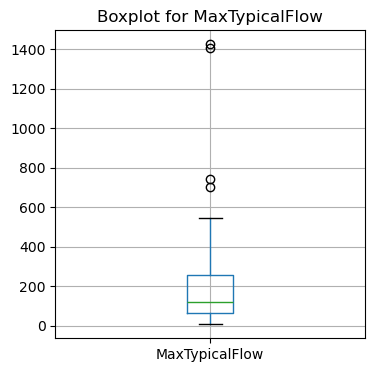

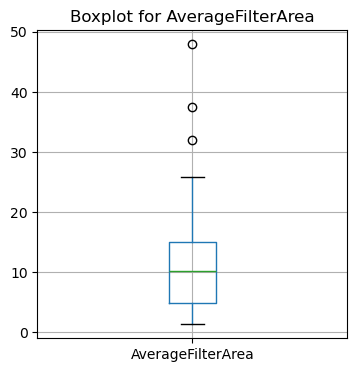

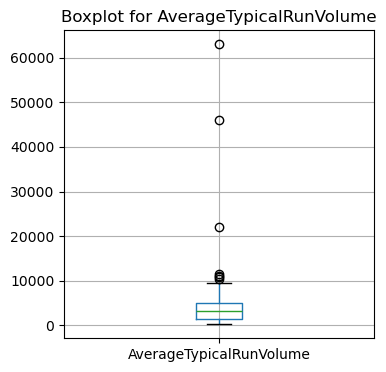

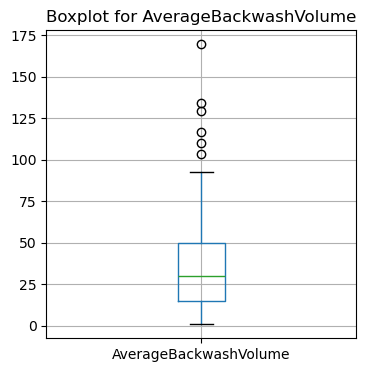

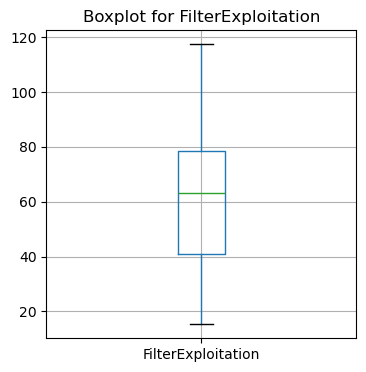

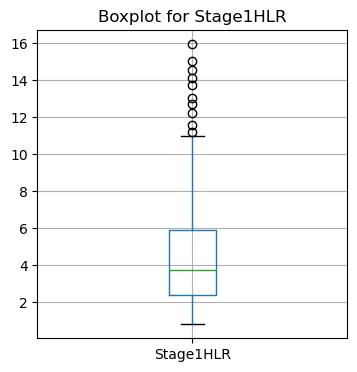

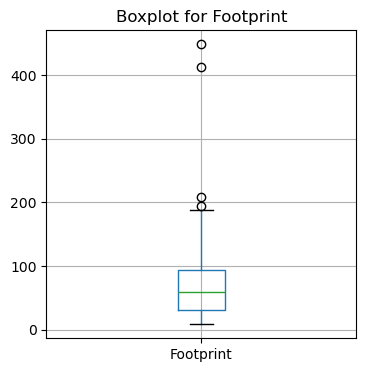

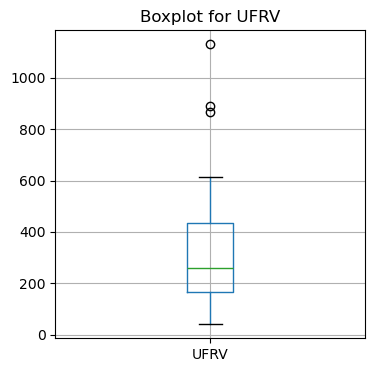

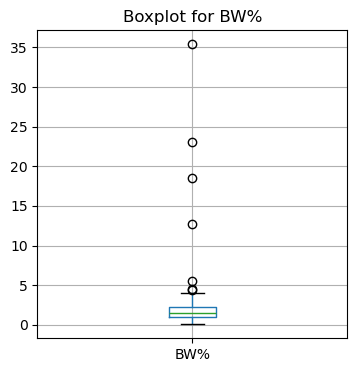

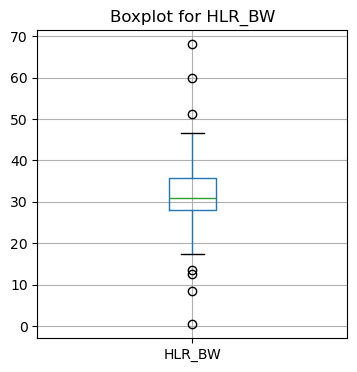

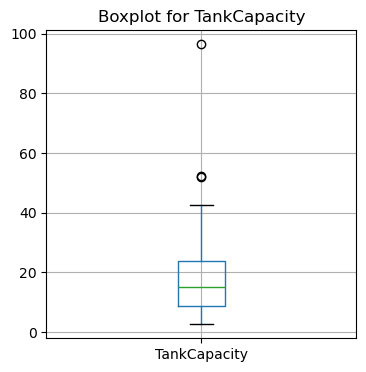

In [8]:
import matplotlib.pyplot as plt

def plot_boxplot_for_null_columns(dataframe):
    # Plot boxplots for columns with null values
    for column in dataframe.columns:
        if dataframe[column].isnull().any():
            plt.figure(figsize=(4, 4))
            dataframe.boxplot(column=[column])
            plt.title(f'Boxplot for {column}')
            plt.show()


plot_boxplot_for_null_columns(df_new)

In [9]:
df_new.describe()

,TotalFilters,MaxTypicalFlow,AverageFilterArea,AverageTypicalRunVolume,AverageBackwashVolume,FilterExploitation,OxygenFactor,Stage1HLR,Footprint,UFRV,BW%,HLR_BW,TankCapacity,AbstractedVolume
count,79.000000,63.000000,75.000000,77.000000,69.000000,63.000000,79.000000,58.000000,75.000000,72.000000,66.000000,52.000000,75.000000,7.900000e+01
mean,6.253165,218.548317,11.701130,5084.251052,39.444947,60.364608,1.903975,5.209221,77.606708,312.084063,2.958973,31.658679,18.293085,1.098328e+06
std,4.046107,276.007063,8.713576,8915.477406,35.830905,23.630246,0.253423,4.231190,74.700616,205.220383,5.505880,11.599788,14.290136,1.854600e+06
min,1.000000,6.500000,1.327323,250.000000,0.800000,15.335576,1.128000,0.807604,8.352477,40.743665,0.073715,0.469337,2.576075,6.710000e+03
25%,3.000000,61.665000,4.908739,1500.000000,15.000000,40.881888,1.786667,2.387683,30.610861,166.430789,0.999476,28.112067,8.697479,2.427655e+05
50%,5.000000,120.000000,10.178760,3250.000000,30.000000,63.279585,1.933333,3.742502,59.830096,258.637091,1.525787,30.889453,15.097670,5.980330e+05
75%,8.000000,257.650000,14.986250,5000.000000,50.000000,78.567831,2.090000,5.897265,94.377094,433.805656,2.260182,35.800161,23.851035,1.216296e+06
max,20.000000,1426.000000,47.940002,63000.000000,169.550000,117.396568,2.360000,15.954421,448.614229,1130.094353,35.386015,68.022071,96.433289,1.145478e+07


We chose to remove outliers in NUMBERIC columns that are above lower bound and below upper bound. (Categorical data handled later on)

In [10]:

def remove_outliers_for_all_columns(dataframe, k=1.5):
    # Remove outliers for all numeric columns
    for column in dataframe.select_dtypes(include='number').columns:
        Q1 = dataframe[column].quantile(0.25)
        Q3 = dataframe[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - k * IQR
        upper_bound = Q3 + k * IQR
        dataframe = dataframe[((dataframe[column].isnull()) | (dataframe[column] >= lower_bound)) & (dataframe[column] <= upper_bound)]

    return dataframe

df_without_outliers = remove_outliers_for_all_columns(df_new)

df_without_outliers

,TotalFilters,MaxTypicalFlow,AverageFilterArea,AverageTypicalRunVolume,AverageBackwashVolume,PrimaryTrigger,FilterExploitation,AerationType,OxygenFactor,Stage1HLR,Footprint,UFRV,BW%,HLR_BW,TankCapacity,GravityPressureMixed,Stages,AbstractedVolume
5,12,215.00,14.299999,2833.333333,30.0,Volume,70.189020,Cascade,1.786667,1.879371,86.539475,148.601406,1.411789,17.482518,26.506498,Gravity,Double,1321940
7,7,112.17,6.610000,3342.857143,23.0,Volume,77.547412,Bottom aeration,1.940000,4.242436,40.823385,302.571861,1.517347,30.257186,16.612073,Pressure,Mixed,761988
12,3,110.00,8.042477,3495.079452,34.0,Time,64.436903,Bottom aeration,2.180000,4.559126,38.551646,434.577465,0.999333,31.084949,14.108234,Mixed,Single,620914
16,6,255.30,11.295000,1877.420548,30.0,Time,61.281517,Cascade,2.153333,3.767154,44.454532,166.216958,1.597937,31.872510,5.369069,Gravity,Single,1370517
22,2,25.00,1.767146,450.000000,0.8,Volume,19.862557,No primary aeration,2.066667,7.073553,89.430459,254.647909,0.177016,13.581222,10.069197,Pressure,Single,43499
23,3,92.10,13.000000,5000.000000,34.0,Volume,99.878780,Other,1.920000,2.361538,48.601220,384.615385,0.680054,24.615385,16.306412,Gravity,Single,805818
31,8,9.90,2.650000,675.000000,5.0,Volume,117.396568,Bottom aeration,1.860000,0.853448,105.920596,120.689655,2.114703,31.034483,17.208357,Gravity,Double,101811
35,10,262.50,14.299999,5000.000000,22.0,Volume,84.807871,Bottom aeration,1.926667,1.835664,74.154467,349.650368,0.440016,29.370631,6.737919,Gravity,Single,1950157
44,4,73.14,14.400000,8000.000000,25.0,Volume,81.015111,Cascade,1.813333,2.539583,53.884250,277.777778,0.833415,12.500000,5.062911,Gravity,Double,519069
45,6,123.20,25.425001,5000.000000,72.0,Volume,111.147279,Bottom aeration,1.628000,0.807604,92.291222,196.656825,1.439972,26.902654,10.778959,Gravity,Single,1199537


Visualizing the distribution of our numeric data

c:\Users\migle\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


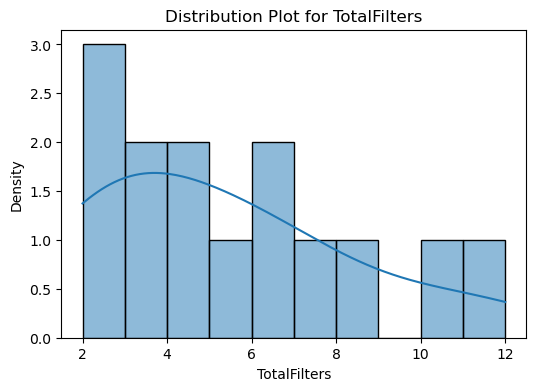

c:\Users\migle\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


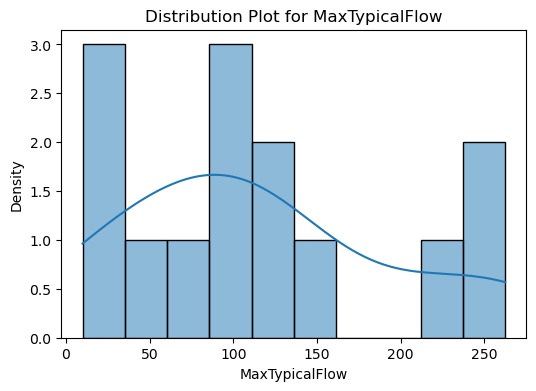

c:\Users\migle\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


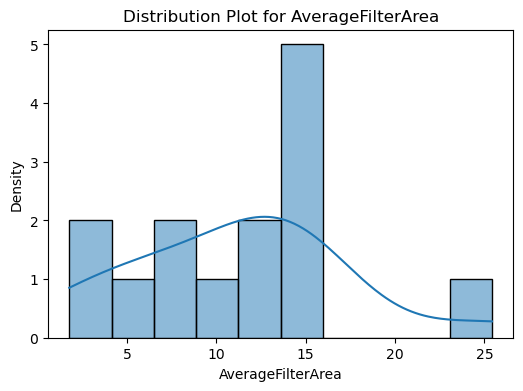

c:\Users\migle\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


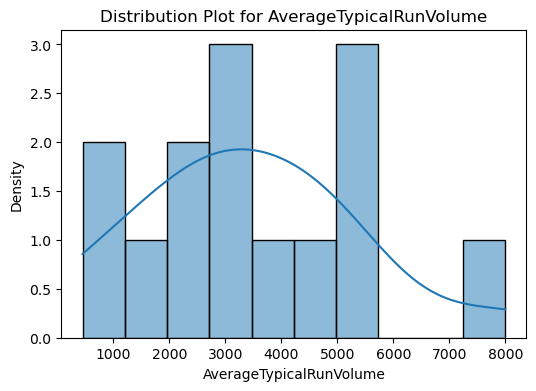

c:\Users\migle\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


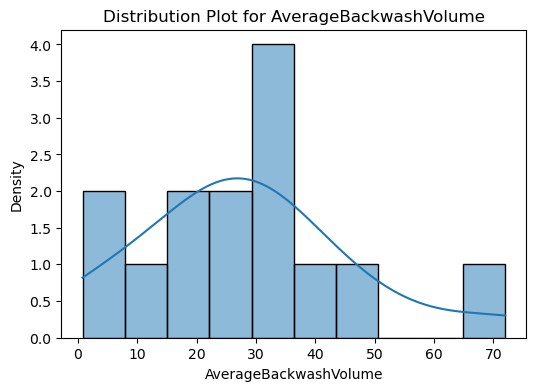

c:\Users\migle\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


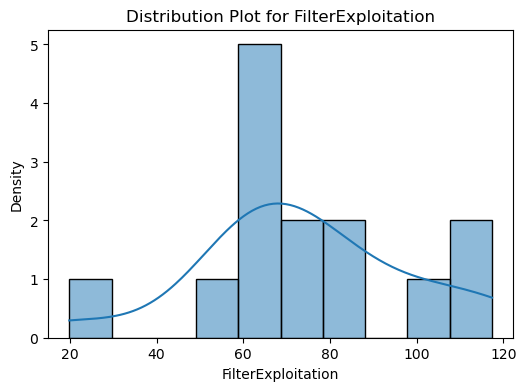

c:\Users\migle\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


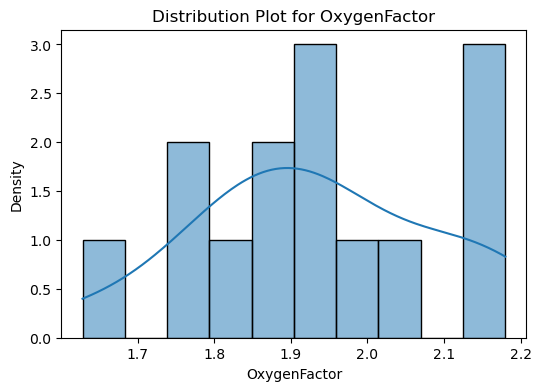

c:\Users\migle\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


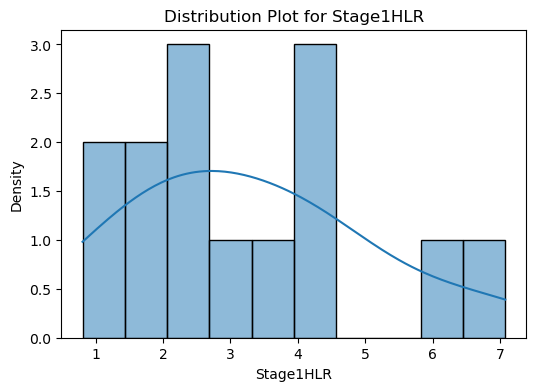

c:\Users\migle\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


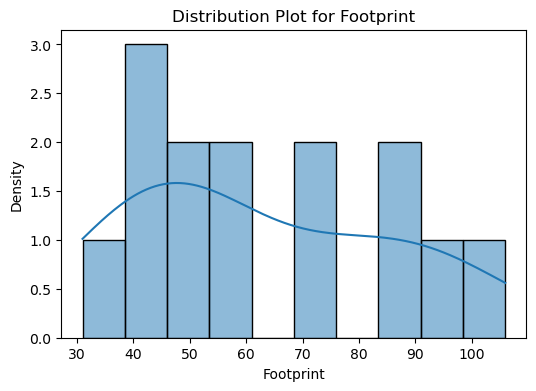

c:\Users\migle\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


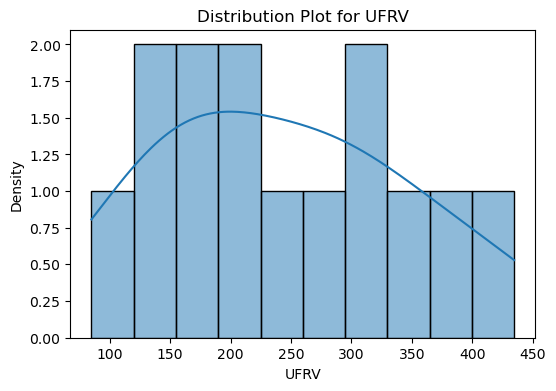

c:\Users\migle\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


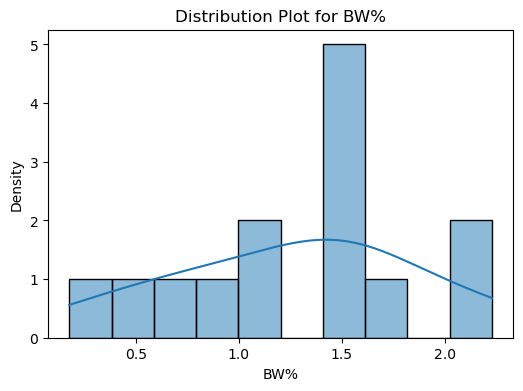

c:\Users\migle\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


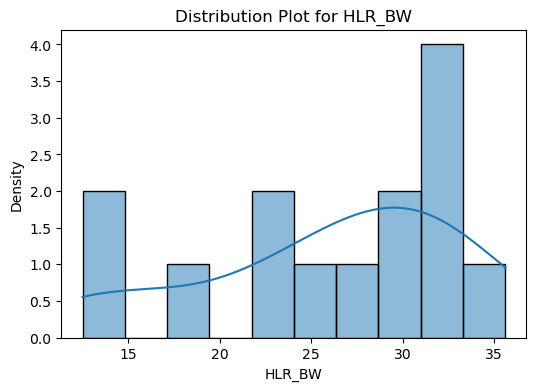

c:\Users\migle\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


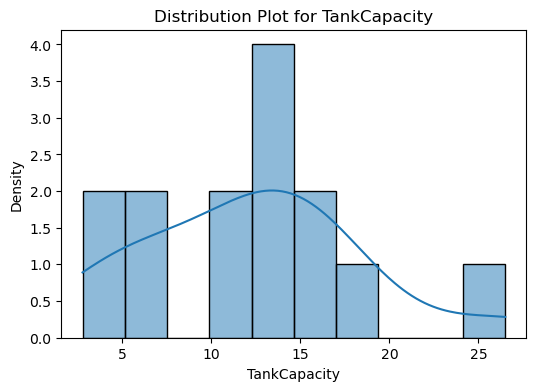

c:\Users\migle\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


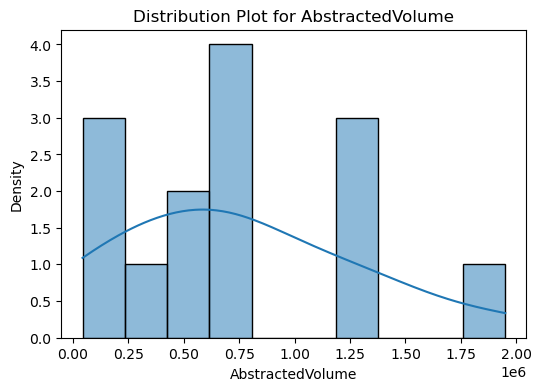

In [11]:
import seaborn as sns

def plot_distplot_for_numeric_columns(dataframe):
    # Iterate through columns
    for column in dataframe.select_dtypes(include='number').columns:
        plt.figure(figsize=(6, 4))
        sns.histplot(dataframe[column].dropna(), kde=True, bins=10)
        plt.title(f'Distribution Plot for {column}')
        plt.xlabel(column)
        plt.ylabel('Density')
        plt.show()


plot_distplot_for_numeric_columns(df_without_outliers)

In [12]:
df_without_outliers.describe()

,TotalFilters,MaxTypicalFlow,AverageFilterArea,AverageTypicalRunVolume,AverageBackwashVolume,FilterExploitation,OxygenFactor,Stage1HLR,Footprint,UFRV,BW%,HLR_BW,TankCapacity,AbstractedVolume
count,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,1.400000e+01
mean,5.285714,115.407857,11.259553,3434.549320,28.564286,73.944696,1.933905,3.276642,62.834020,242.902901,1.265478,25.949693,12.243313,7.525754e+05
std,3.099096,80.906755,6.132647,1989.920341,18.249198,24.697452,0.158503,1.812613,23.492893,103.272224,0.597975,7.122841,6.185746,5.494188e+05
min,2.000000,9.900000,1.767146,450.000000,0.800000,19.862557,1.628000,0.807604,31.019942,84.876537,0.177016,12.500000,2.755597,4.349900e+04
25%,3.000000,63.135000,6.968119,2182.500000,20.500000,62.070363,1.825000,1.999913,45.198087,167.397761,0.874895,23.663821,7.570739,3.835628e+05
50%,4.500000,105.000000,12.147500,3371.428571,27.500000,67.519339,1.923333,2.909639,54.898253,234.367407,1.425880,28.136642,13.006452,6.914510e+05
75%,6.750000,143.300000,14.299999,4875.000000,34.000000,83.859681,2.045000,4.255053,83.443223,300.611744,1.577790,31.072332,15.756867,1.101107e+06
max,12.000000,262.500000,25.425001,8000.000000,72.000000,117.396568,2.180000,7.073553,105.920596,434.577465,2.230214,35.612536,26.506498,1.950157e+06


Now we should choose how to deal with NaN values - fill or remove? We will fill the NaN values with mean and mode. We can use mean because we got rid of outliers so it will be less sensitive  

In [13]:
df_without_outliers.isnull().sum()

TotalFilters               0
MaxTypicalFlow             0
AverageFilterArea          0
AverageTypicalRunVolume    0
AverageBackwashVolume      0
PrimaryTrigger             0
FilterExploitation         0
AerationType               0
OxygenFactor               0
Stage1HLR                  0
Footprint                  0
UFRV                       0
BW%                        0
HLR_BW                     0
TankCapacity               0
GravityPressureMixed       0
Stages                     0
AbstractedVolume           0
dtype: int64

If there are more than 5 NaN values, we want to replace them with a mean. Else we can remove the row.

In [14]:

def replace_nan_with_mean_or_remove_rows(dataframe):
    # Iterate through columns
    for column in dataframe.columns:
        # Check if column has more than 5 NaN values
        if dataframe[column].isna().sum() > 5:
            # Replace NaN values with the mean of the column
            mean_value = dataframe[column].mean()
            dataframe[column].fillna(mean_value, inplace=True)
        else:
            # Remove rows with NaN values in this column
            dataframe.dropna(subset=[column], inplace=True)

    return dataframe

df_processed = replace_nan_with_mean_or_remove_rows(df)

df_processed.isnull().sum()

TotalFilters                 0
MaxTypicalFlow               0
AverageFilterArea            0
AverageTypicalRunVolume      0
AverageBackwashVolume        0
PrimaryTrigger               0
AverageTotalFilterDepth      0
OverallFilterGrainSizeMin    0
OverallFilterGrainSizeMax    0
AverageFilterBedVolume       0
FilterExploitation           0
AerationType                 0
OxygenFactor                 0
Stage1HLR                    0
TotalEBCT                    0
Footprint                    0
SumOfld_layer                0
UniformityCoefficient        0
UFRV                         0
BW%                          0
HLR_BW                       0
TankCapacity                 0
TankExploitation             0
GravityPressureMixed         0
Stages                       0
AbstractedVolume             0
dtype: int64

In [15]:
df_processed

,TotalFilters,MaxTypicalFlow,AverageFilterArea,AverageTypicalRunVolume,AverageBackwashVolume,PrimaryTrigger,AverageTotalFilterDepth,OverallFilterGrainSizeMin,OverallFilterGrainSizeMax,AverageFilterBedVolume,...,SumOfld_layer,UniformityCoefficient,UFRV,BW%,HLR_BW,TankCapacity,TankExploitation,GravityPressureMixed,Stages,AbstractedVolume
0,6,50.000000,6.000000,5200.00000,10.00,Time,149.444629,1.198333,22.545238,17.541758,...,919.543274,2.553929,866.666667,0.414525,31.102967,27.294778,22.865141,Gravity,Single,253543
1,4,110.000000,4.908739,300.00000,28.00,Volume,310.000000,0.800000,5.000000,15.217089,...,2891.666665,2.553929,40.743665,23.000062,30.557749,2.576075,22.865141,Pressure,Double,612094
2,4,120.000000,15.343900,3800.00000,83.30,Volume,190.000000,2.000000,35.000000,28.970630,...,759.000000,1.491000,249.217919,2.192086,32.791831,21.825600,22.865141,Gravity,Double,682318
3,2,218.548317,16.000000,1200.00000,26.00,Volume,149.444629,1.198333,22.545238,17.541758,...,919.543274,2.553929,75.000000,2.166907,31.102967,12.554300,22.865141,Gravity,Single,156998
4,2,218.548317,1.495000,250.00000,4.50,Volume,149.444629,1.600000,32.000000,17.541758,...,919.543274,2.553929,167.224093,1.818182,31.102967,52.220566,22.865141,Gravity,Single,6710
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,4,74.000000,2.544690,750.00000,12.00,Volume,149.444629,1.198333,22.545238,17.541758,...,919.543274,2.553929,196.487595,3.077100,39.297519,25.159020,12.500000,Pressure,Double,330776
72,8,218.548317,24.400000,5700.00000,92.00,Volume,149.444629,1.198333,22.545238,17.541758,...,919.543274,2.553929,180.327872,12.775496,29.508197,23.532836,22.865141,Gravity,Double,893390
73,4,81.080000,7.750000,3360.00000,15.60,Time,149.444629,1.198333,22.545238,17.541758,...,919.543274,2.553929,433.548387,1.791061,31.102967,96.433289,8.592965,Gravity,Single,181680
75,20,1407.290000,10.178760,4500.00000,57.00,Volume,190.000000,0.800000,8.000000,19.339643,...,1708.095230,1.625000,442.097088,1.236822,51.086775,6.040393,22.865141,Pressure,Single,11021800


### Lets process Categorical data

1. Lets find how many unique categorical values are there and in which columns

In [16]:
df_processed.describe(include=['O'])  # for categorical data

,PrimaryTrigger,AerationType,GravityPressureMixed,Stages
count,68,68,68,68
unique,3,8,3,4
top,Volume,Bottom aeration,Gravity,Single
freq,49,26,47,35


2. View all types of unique values in each columns

In [17]:
# List of column names containing categorical values
columns_of_interest = ['PrimaryTrigger', 'AerationType', 'GravityPressureMixed', 'Stages']

# Iterate over each column
for column_name in columns_of_interest:
    unique_values = df_processed[column_name].unique()
    print(f"Unique values in column '{column_name}': {unique_values}")

Unique values in column 'PrimaryTrigger': ['Time' 'Volume' 'Waterlevel above filter']
Unique values in column 'AerationType': ['Cascade' 'Air injection' 'Bottom aeration' 'Pure oxygen injection'
 'Passive plate aerator' 'No primary aeration' 'Other' 'Inka']
Unique values in column 'GravityPressureMixed': ['Gravity' 'Pressure' 'Mixed']
Unique values in column 'Stages': ['Single' 'Double' 'Mixed' 'Triple']


3. Encoding of categorical data is based on binary(yes/no or true/false), nominal(unordered) and ordinal(ordered) types. Lets assume that PrimaryTrigger and AerationType columns contain nominal data, while GravityPressureMixed and Stages contain ordinal. This means that we will have to use two different types of encoding methods

4. Encoding of ordinal features - GravityPressureMixed and Stages

In [18]:
import category_encoders as ce

# Define the columns you want to encode and their respective mappings
columns_to_encode = {
    "GravityPressureMixed": {"Gravity": 1, "Pressure": 2, "Mixed": 3},
    "Stages": {"Single": 1, "Double": 2, "Triple": 3, "Mixed": 4}  
}

# Create an empty list to store encoder objects
encoders = []

# Iterate over each column and its mapping
for column, mapping in columns_to_encode.items():
    encoder = ce.OrdinalEncoder(cols=[column], mapping=[{'col': column, 'mapping': mapping}])
    encoders.append(encoder)

# Apply encoding to each column separately
for encoder in encoders:
    df_processed = encoder.fit_transform(df_processed)

# Print the encoded DataFrame
print(df_processed)

    TotalFilters  MaxTypicalFlow  AverageFilterArea  AverageTypicalRunVolume  \
0              6       50.000000           6.000000               5200.00000   
1              4      110.000000           4.908739                300.00000   
2              4      120.000000          15.343900               3800.00000   
3              2      218.548317          16.000000               1200.00000   
4              2      218.548317           1.495000                250.00000   
..           ...             ...                ...                      ...   
71             4       74.000000           2.544690                750.00000   
72             8      218.548317          24.400000               5700.00000   
73             4       81.080000           7.750000               3360.00000   
75            20     1407.290000          10.178760               4500.00000   
76             6      250.000000          14.752500               2331.50137   

    AverageBackwashVolume PrimaryTrigge

5. Encoding nominal features - PrimaryTrigger and AerationType columns

In [20]:
from sklearn.preprocessing import OneHotEncoder

# Sample data (replace with your actual dataset)
data = {
    'PrimaryTrigger': ['Time', 'Volume', 'Waterlevel above filter', 'Time'],
    'AerationType': ['Cascade', 'Air injection', 'Bottom aeration', 'Pure oxygen injection']
}

# Initialize OneHotEncoder
encoder = OneHotEncoder(sparse=False, drop='first')

# Fit and transform the categorical columns
encoded_data = encoder.fit_transform(df_processed[['PrimaryTrigger', 'AerationType']])

# Get the column names after one-hot encoding
column_names = encoder.get_feature_names_out(['PrimaryTrigger', 'AerationType'])

# Create a DataFrame with the encoded data
encoded_df = pd.DataFrame(encoded_data, columns=column_names)

print(encoded_df)

#Now we have new columns such as PrimaryTrigger_Volume / PrimaryTrigger_Time etc. with designated values 1 or 0. 


    PrimaryTrigger_Volume  PrimaryTrigger_Waterlevel above filter  \
0                     0.0                                     0.0   
1                     1.0                                     0.0   
2                     1.0                                     0.0   
3                     1.0                                     0.0   
4                     1.0                                     0.0   
..                    ...                                     ...   
63                    1.0                                     0.0   
64                    1.0                                     0.0   
65                    0.0                                     0.0   
66                    1.0                                     0.0   
67                    0.0                                     0.0   

    AerationType_Bottom aeration  AerationType_Cascade  AerationType_Inka  \
0                            0.0                   1.0                0.0   
1                

c:\Users\migle\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
